# Prepare Env

In [12]:
import pandas as pd

# Load Dataset 

In [13]:
DATA_PATH = "../data/data_for_project.txt" 

In [14]:
df = pd.read_csv(DATA_PATH, sep=";")
df.head()

,HourUTC,HourDK,PriceArea,ConsumerType_DE35,TotalCon
0,2023-06-30 21:00,2023-06-30 23:00,DK1,111,65920.0
1,2023-06-30 21:00,2023-06-30 23:00,DK2,111,47018.0
2,2023-06-30 21:00,2023-06-30 23:00,DK1,112,1313.0
3,2023-06-30 21:00,2023-06-30 23:00,DK2,112,933.0
4,2023-06-30 21:00,2023-06-30 23:00,DK1,119,21806.0


# Preprocess & Initial Exploration 

## Basic Info 

In [15]:
# Display the number of rows and columns
num_rows, num_cols = df.shape
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_cols}")

# Display column names
print("Column names:")
print(df.columns)

# Display data types of each column
print("Data types:")
print(df.dtypes)


Number of rows: 1183323
Number of columns: 5
Column names:
Index(['HourUTC', 'HourDK', 'PriceArea', 'ConsumerType_DE35', 'TotalCon'], dtype='object')
Data types:
HourUTC               object
HourDK                object
PriceArea             object
ConsumerType_DE35      int64
TotalCon             float64
dtype: object


In [16]:
df.describe()

,ConsumerType_DE35,TotalCon
count,1.183323e+06,1.183322e+06
mean,3.488941e+02,5.026788e+04
std,1.625421e+02,1.273728e+05
min,1.110000e+02,2.900000e+01
25%,2.150000e+02,7.455000e+03
50%,3.810000e+02,2.176600e+04
75%,4.420000e+02,4.027100e+04
max,9.990000e+02,1.858539e+06


## Missing Value

In [17]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)


Missing values per column:
HourUTC              0
HourDK               0
PriceArea            0
ConsumerType_DE35    0
TotalCon             1
dtype: int64


In [18]:
# `TotalCon` has one missing value, therefore remove it 
df.dropna(subset=['TotalCon'], inplace=True)

## Unique Value

In [19]:
# List unique values in categorical columns
print("Unique values in categorical columns:")
# for column in df.select_dtypes(include=['object']):
for column in df:
    unique_values = df[column].unique()
    print(f"{column}: {unique_values}")
    print(f"Number of unique values: {len(unique_values)}")
    print()


Unique values in categorical columns:
HourUTC: ['2023-06-30 21:00' '2023-06-30 20:00' '2023-06-30 19:00' ...
 '2021-09-20 05:00' '2021-09-20 04:00' '2021-09-20 03:00']
Number of unique values: 15571

HourDK: ['2023-06-30 23:00' '2023-06-30 22:00' '2023-06-30 21:00' ...
 '2021-09-20 07:00' '2021-09-20 06:00' '2021-09-20 05:00']
Number of unique values: 15569

PriceArea: ['DK1' 'DK2']
Number of unique values: 2

ConsumerType_DE35: [111 112 119 121 122 123 130 211 212 215 220 310 320 330 340 350 360 370
 381 382 390 410 421 422 431 432 433 441 442 443 444 445 446 447 450 461
 462 999]
Number of unique values: 38

TotalCon: [ 65920.  47018.   1313. ... 141287. 106742. 803923.]
Number of unique values: 171968



## Check Duplicate 

In [20]:
# Remove duplicate rows
df = df.drop_duplicates()
df.head()

,HourUTC,HourDK,PriceArea,ConsumerType_DE35,TotalCon
0,2023-06-30 21:00,2023-06-30 23:00,DK1,111,65920.0
1,2023-06-30 21:00,2023-06-30 23:00,DK2,111,47018.0
2,2023-06-30 21:00,2023-06-30 23:00,DK1,112,1313.0
3,2023-06-30 21:00,2023-06-30 23:00,DK2,112,933.0
4,2023-06-30 21:00,2023-06-30 23:00,DK1,119,21806.0


## Type Conversion  

In [21]:
# Convert a column to datetime if it contains dates
df['HourUTC'] = pd.to_datetime(df['HourUTC'])
df.head()

,HourUTC,HourDK,PriceArea,ConsumerType_DE35,TotalCon
0,2023-06-30 21:00:00,2023-06-30 23:00,DK1,111,65920.0
1,2023-06-30 21:00:00,2023-06-30 23:00,DK2,111,47018.0
2,2023-06-30 21:00:00,2023-06-30 23:00,DK1,112,1313.0
3,2023-06-30 21:00:00,2023-06-30 23:00,DK2,112,933.0
4,2023-06-30 21:00:00,2023-06-30 23:00,DK1,119,21806.0


## TODO: Handling Outliers (Optional) 

In [22]:
# Define a function to detect outliers using z-scores and remove them
import numpy as np 
from scipy import stats
z_scores = np.abs(stats.zscore(df['TotalCon']))
df[(z_scores < 3)]


,HourUTC,HourDK,PriceArea,ConsumerType_DE35,TotalCon
0,2023-06-30 21:00:00,2023-06-30 23:00,DK1,111,65920.0
1,2023-06-30 21:00:00,2023-06-30 23:00,DK2,111,47018.0
2,2023-06-30 21:00:00,2023-06-30 23:00,DK1,112,1313.0
3,2023-06-30 21:00:00,2023-06-30 23:00,DK2,112,933.0
4,2023-06-30 21:00:00,2023-06-30 23:00,DK1,119,21806.0
...,...,...,...,...,...
1183317,2021-09-20 04:00:00,2021-09-20 06:00,DK2,461,41618.0
1183318,2021-09-20 04:00:00,2021-09-20 06:00,DK2,462,15845.0
1183319,2021-09-20 04:00:00,2021-09-20 06:00,DK2,999,422924.0
1183320,2021-09-20 03:00:00,2021-09-20 05:00,DK1,111,48593.0


# Export data 

In [25]:
# Save cleaned data to a new CSV file
df.to_csv('../data/processed/cleaned_data_30Sep2023.csv', index=False)

# EDA  

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt  

DATA_PATH = "../data/processed/cleaned_data_30Sep2023.csv" 
df = pd.read_csv(DATA_PATH)
df.head()

,HourUTC,HourDK,PriceArea,ConsumerType_DE35,TotalCon
0,2023-06-30 21:00:00,2023-06-30 23:00,DK1,111,65920.0
1,2023-06-30 21:00:00,2023-06-30 23:00,DK2,111,47018.0
2,2023-06-30 21:00:00,2023-06-30 23:00,DK1,112,1313.0
3,2023-06-30 21:00:00,2023-06-30 23:00,DK2,112,933.0
4,2023-06-30 21:00:00,2023-06-30 23:00,DK1,119,21806.0


In [2]:
price_area = df.groupby(['PriceArea','ConsumerType_DE35']) 
price_area.head()

,HourUTC,HourDK,PriceArea,ConsumerType_DE35,TotalCon
0,2023-06-30 21:00:00,2023-06-30 23:00,DK1,111,65920.0
1,2023-06-30 21:00:00,2023-06-30 23:00,DK2,111,47018.0
2,2023-06-30 21:00:00,2023-06-30 23:00,DK1,112,1313.0
3,2023-06-30 21:00:00,2023-06-30 23:00,DK2,112,933.0
4,2023-06-30 21:00:00,2023-06-30 23:00,DK1,119,21806.0
...,...,...,...,...,...
375,2023-06-30 17:00:00,2023-06-30 19:00,DK2,461,28942.0
376,2023-06-30 17:00:00,2023-06-30 19:00,DK1,462,3809.0
377,2023-06-30 17:00:00,2023-06-30 19:00,DK2,462,17729.0
378,2023-06-30 17:00:00,2023-06-30 19:00,DK1,999,753148.0


## Check time frame

Summarize: 
- We have `648 days` 
- Start at `2021-09-20 03:00:00`
- End at `2023-06-30 21:00:00` 
- Around `1500 ~ 1900` report results per day 

### Min time & Max time


In [3]:
# Convert 'HourUTC' column to datetime objects
df['HourUTC'] = pd.to_datetime(df['HourUTC'])


# Find the minimum and maximum time
min_time = df['HourUTC'].min()
max_time = df['HourUTC'].max()
# Calculate the time frame
time_frame = max_time - min_time

print("Minimum Time:", min_time)
print("Maximum Time:", max_time)
print("Time Frame:", time_frame)

Minimum Time: 2021-09-20 03:00:00
Maximum Time: 2023-06-30 21:00:00
Time Frame: 648 days 18:00:00


### Reported result per day 

In [4]:
# Group by the date portion of 'HourUTC' and count the number of results per day
result_per_day = df.groupby(
    df['HourUTC'].dt.date
    ).size().reset_index(name='Count')

print(result_per_day)

        HourUTC  Count
0    2021-09-20   1522
1    2021-09-21   1824
2    2021-09-22   1824
3    2021-09-23   1824
4    2021-09-24   1824
..          ...    ...
644  2023-06-26   1824
645  2023-06-27   1824
646  2023-06-28   1824
647  2023-06-29   1824
648  2023-06-30   1672

[649 rows x 2 columns]


## Trends & Seasonality Analysis  

Using `window_size = 7`, perform rolling mean (moving average) to visualize:   

1. The first subplot displays the original time series data.
2. The second subplot shows the trend component, calculated using a rolling mean.
3. The third subplot displays the seasonality component, which is obtained by subtracting the trend from the original data.


#### Weekly `window_size=7` 

In [5]:
WINDOW_SIZE = 7 

In [6]:
# Set 'HourUTC' as the index
df.set_index('HourUTC', inplace=True)

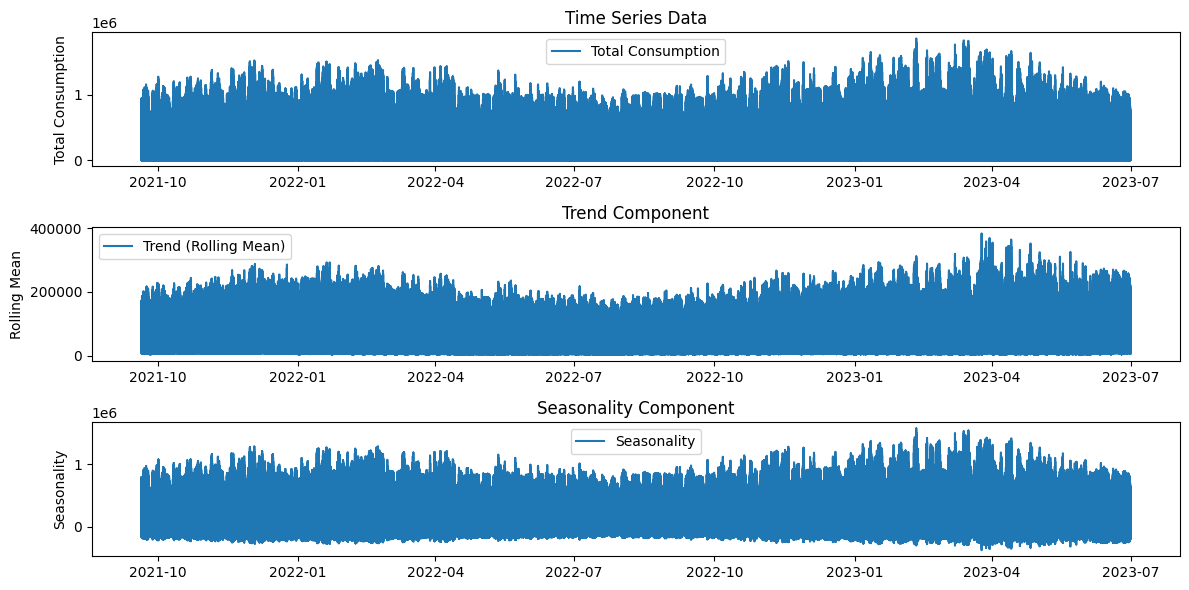

In [7]:
# Plot the time series data
plt.figure(figsize=(12, 6))
plt.subplot(3, 1, 1)
plt.plot(df['TotalCon'], label='Total Consumption')
plt.title('Time Series Data')
plt.ylabel('Total Consumption')
plt.legend()

# Plot the trend component (rolling mean)
plt.subplot(3, 1, 2)
rolling_mean = df['TotalCon'].rolling(window=WINDOW_SIZE).mean()  # Adjust the window size as needed
plt.plot(rolling_mean, label='Trend (Rolling Mean)')
plt.title('Trend Component')
plt.ylabel('Rolling Mean')
plt.legend()

# Plot the seasonality component (residuals after removing trend)
plt.subplot(3, 1, 3)
seasonality = df['TotalCon'] - rolling_mean
plt.plot(seasonality, label='Seasonality')
plt.title('Seasonality Component')
plt.ylabel('Seasonality')
plt.legend()

# Display the plots
plt.tight_layout()
plt.show()

#### Monthly `window_size=30` 

In [8]:
WINDOW_SIZE = 30 

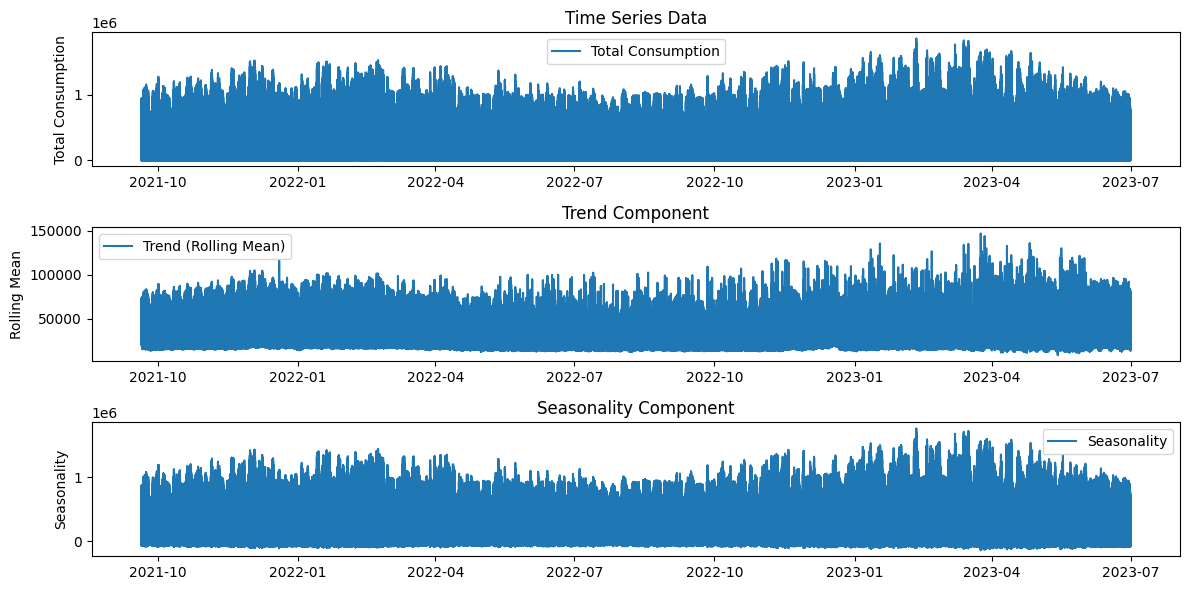

In [9]:
# Plot the time series data
plt.figure(figsize=(12, 6))
plt.subplot(3, 1, 1)
plt.plot(df['TotalCon'], label='Total Consumption')
plt.title('Time Series Data')
plt.ylabel('Total Consumption')
plt.legend()

# Plot the trend component (rolling mean)
plt.subplot(3, 1, 2)
rolling_mean = df['TotalCon'].rolling(window=WINDOW_SIZE).mean()  # Adjust the window size as needed
plt.plot(rolling_mean, label='Trend (Rolling Mean)')
plt.title('Trend Component')
plt.ylabel('Rolling Mean')
plt.legend()

# Plot the seasonality component (residuals after removing trend)
plt.subplot(3, 1, 3)
seasonality = df['TotalCon'] - rolling_mean
plt.plot(seasonality, label='Seasonality')
plt.title('Seasonality Component')
plt.ylabel('Seasonality')
plt.legend()

# Display the plots
plt.tight_layout()
plt.show()

## Decomposition

**TODO: Research more about this, I'm not familiar with this** 



The residual component, often referred to simply as "residuals" or "errors," is one of the key components obtained during the decomposition of a time series. It represents the unexplained variation or the discrepancies between the observed data and the other components of the decomposition, namely the trend and seasonality.

In time series decomposition, the data is assumed to be the sum of three main components:

1. Trend Component: This component captures the long-term underlying pattern or trend in the data. It represents the overall direction in which the time series is moving. The trend component can be either upward (indicating growth) or downward (indicating a decline) or remain relatively flat.

2. Seasonal Component: The seasonal component accounts for patterns that repeat at regular intervals, such as daily, weekly, monthly, or yearly. It represents the systematic, calendar-based fluctuations in the data. For example, retail sales often exhibit seasonal patterns, with higher sales during holiday seasons.

3. Residual Component: The residual component captures the random noise or unexplained variability in the time series data that is not accounted for by the trend and seasonal components. It represents the "leftover" or residual part of the data after removing the predictable patterns. Residuals can contain information about unexpected events, measurement errors, or other irregular fluctuations.

In [10]:
import statsmodels.api as sm

### `period=1`

In [12]:
PERIOD=1

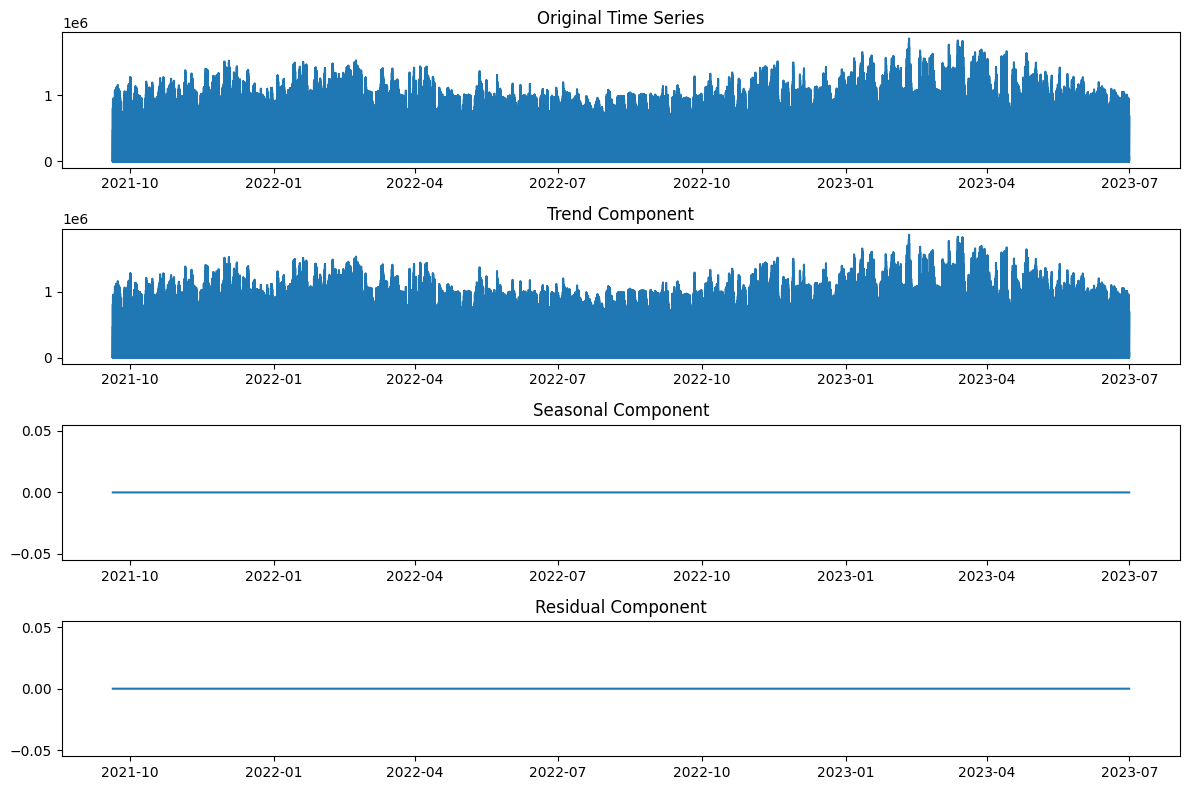

In [13]:
# Decompose the time series
decomposition = sm.tsa.seasonal_decompose(df['TotalCon'], model='additive', period=PERIOD)
# You can adjust the period parameter if seasonality is present. Use period=1 for non-seasonal data.

# Plot the decomposed components
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 8))

ax1.set_title('Original Time Series')
ax1.plot(df.index, df['TotalCon'], label='Original', linestyle='-')

ax2.set_title('Trend Component')
ax2.plot(decomposition.trend.index, decomposition.trend, label='Trend', linestyle='-')

ax3.set_title('Seasonal Component')
ax3.plot(decomposition.seasonal.index, decomposition.seasonal, label='Seasonal', linestyle='-')

ax4.set_title('Residual Component')
ax4.plot(decomposition.resid.index, decomposition.resid, label='Residual', linestyle='-')

plt.tight_layout()
plt.show()

### `period=24`

In [19]:
PERIOD=24

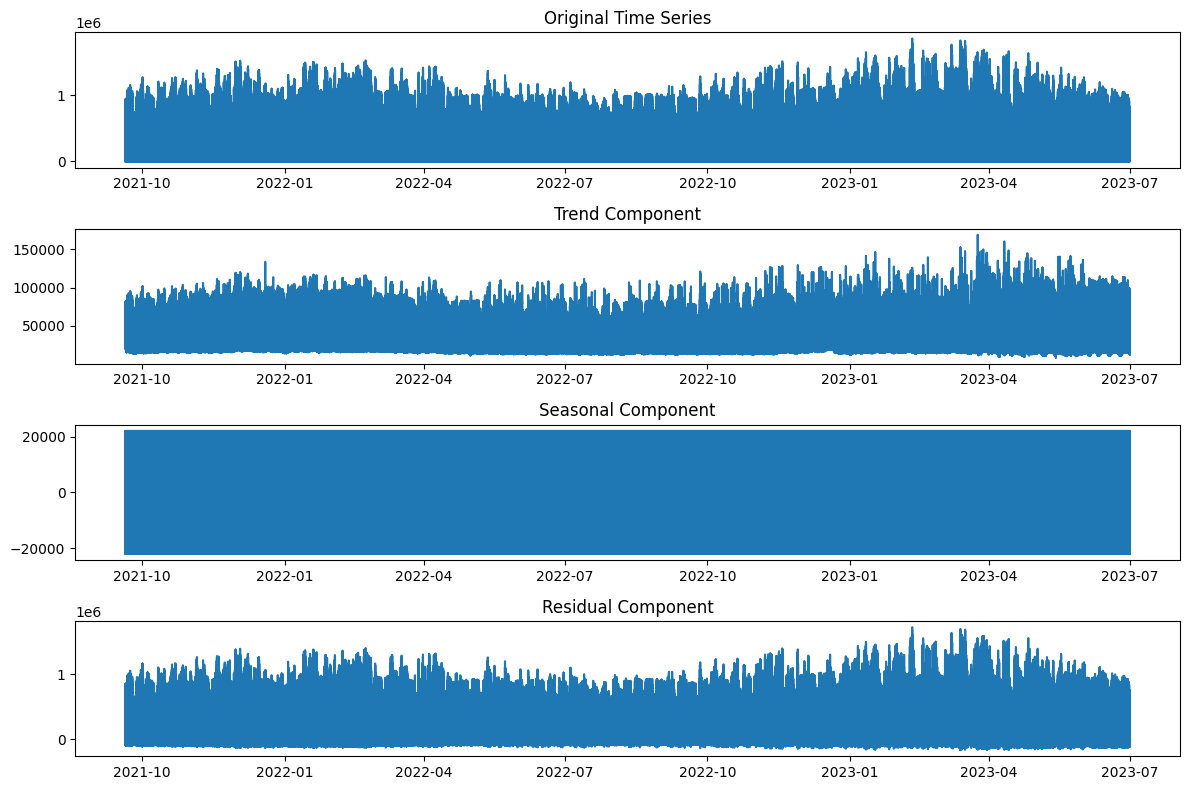

In [20]:

# Decompose the time series
decomposition = sm.tsa.seasonal_decompose(
    df['TotalCon'], model='additive', 
    period=PERIOD
)
# You can adjust the period parameter if seasonality is present. Use period=1 for non-seasonal data.

# Plot the decomposed components
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 8))

ax1.set_title('Original Time Series')
ax1.plot(df.index, df['TotalCon'], label='Original', linestyle='-')

ax2.set_title('Trend Component')
ax2.plot(decomposition.trend.index, decomposition.trend, label='Trend', linestyle='-')

ax3.set_title('Seasonal Component')
ax3.plot(decomposition.seasonal.index, decomposition.seasonal, label='Seasonal', linestyle='-')

ax4.set_title('Residual Component')
ax4.plot(decomposition.resid.index, decomposition.resid, label='Residual', linestyle='-')

plt.tight_layout()
plt.show()

## Summarize: 
- It indicate that the dataset doesn't have a strong seasonality and trends
- Stable over time